## Jax Level 0 - Chapter 1
### Part 2 - Data Owner responds to the requests

Link to the original Jax tutorial: https://jax.readthedocs.io/en/latest/jax-101/01-jax-basics.html

In [1]:
# Import the necessary libraries
import syft as sy
sy.requires(">=0.8-beta")

/home/teo/anaconda3/envs/PySyft/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
kj/filesystem-disk-unix.c++:1703: warning: PWD environment variable doesn't match current directory; pwd = /home/teo


✅ The installed version of syft==0.8.0b7 matches the requirement >=0.8b0


In [2]:
# Check domain notifications
node = sy.orchestra.launch(name="test-domain-1")
domain_client = node.login(email="info@openmined.org", password="changethis")
domain_client.notifications

SQLite Store Path:
!open file:///tmp/7bca415d13ed1ec841f0d0aede098dbb.sqlite

> Starting Worker: test-domain-1 - 7bca415d13ed1ec841f0d0aede098dbb - NodeType.DOMAIN - [<class 'syft.core.node.new.user_service.UserService'>, <class 'syft.core.node.new.metadata_service.MetadataService'>, <class 'syft.core.node.new.action_service.ActionService'>, <class 'syft.core.node.new.test_service.TestService'>, <class 'syft.core.node.new.dataset_service.DatasetService'>, <class 'syft.core.node.new.user_code_service.UserCodeService'>, <class 'syft.core.node.new.request_service.RequestService'>, <class 'syft.core.node.new.data_subject_service.DataSubjectService'>, <class 'syft.core.node.new.network_service.NetworkService'>, <class 'syft.core.node.new.policy_service.PolicyService'>, <class 'syft.core.node.new.message_service.MessageService'>, <class 'syft.core.node.new.project_service.ProjectService'>, <class 'syft.core.node.new.data_subject_member_service.DataSubjectMemberService'>]


,type,id,subject,status,created_at,linked_obj
0,syft.core.node.new.messages.Message,9b7bdd5c4d7f4708a0e7f6a8c5286b55,Approval Request,MessageStatus.UNDELIVERED,2023-04-14 10:19:35,<<class 'syft.core.node.new.request.Request'>:...
1,syft.core.node.new.messages.Message,ff9d737b02c84b259693cbf1b86c4d54,Approval Request,MessageStatus.UNDELIVERED,2023-04-14 10:19:35,<<class 'syft.core.node.new.request.Request'>:...
2,syft.core.node.new.messages.Message,c8f7a20bee4a4fec8af318e6c5f3704c,Approval Request,MessageStatus.UNDELIVERED,2023-04-14 10:19:36,<<class 'syft.core.node.new.request.Request'>:...
3,syft.core.node.new.messages.Message,7c3b78310c3242038757e13f457e070e,Approval Request,MessageStatus.UNDELIVERED,2023-04-14 10:19:36,<<class 'syft.core.node.new.request.Request'>:...
4,syft.core.node.new.messages.Message,7e1c2c5b507b4853930977de98da76d3,Approval Request,MessageStatus.UNDELIVERED,2023-04-14 10:19:35,<<class 'syft.core.node.new.request.Request'>:...


In [3]:
# Get messages from domain
messages = domain_client.api.services.messages.get_all()
messages


,type,id,subject,status,created_at,linked_obj
0,syft.core.node.new.messages.Message,9b7bdd5c4d7f4708a0e7f6a8c5286b55,Approval Request,MessageStatus.UNDELIVERED,2023-04-14 10:19:35,<<class 'syft.core.node.new.request.Request'>:...
1,syft.core.node.new.messages.Message,ff9d737b02c84b259693cbf1b86c4d54,Approval Request,MessageStatus.UNDELIVERED,2023-04-14 10:19:35,<<class 'syft.core.node.new.request.Request'>:...
2,syft.core.node.new.messages.Message,c8f7a20bee4a4fec8af318e6c5f3704c,Approval Request,MessageStatus.UNDELIVERED,2023-04-14 10:19:36,<<class 'syft.core.node.new.request.Request'>:...
3,syft.core.node.new.messages.Message,7c3b78310c3242038757e13f457e070e,Approval Request,MessageStatus.UNDELIVERED,2023-04-14 10:19:36,<<class 'syft.core.node.new.request.Request'>:...
4,syft.core.node.new.messages.Message,7e1c2c5b507b4853930977de98da76d3,Approval Request,MessageStatus.UNDELIVERED,2023-04-14 10:19:35,<<class 'syft.core.node.new.request.Request'>:...


In [4]:
# Fetch the dataset
results = domain_client.api.services.dataset.get_all()
dataset = results[0]
mock = dataset.assets[0].data.syft_action_data
xs = dataset.assets[1].data.syft_action_data
ys = dataset.assets[2].data.syft_action_data

In [5]:
possible_kwargs = {
    "func": {},
    "func_timeit": {},
    "func_sum_of_squares" : {"x": mock},
    "func_sum_squared_error" : {"x": mock},
    "func_sum_squared_error_with_aux" : {"x": mock},
    "func_naive_modify" : {"x": mock},
    "func_jax_modify" : {},
    "training_loop" : {'xs': xs, 'ys': ys}
}


func
[0 1 2 3 4 5 6 7 8 9]
message="<class 'syft.core.node.new.action_object.AnyActionObject'> saved"
[0 1 2 3 4 5 6 7 8 9]
message='Request 37f8c642f0f0471eb4edcaa09b39a299 changes applied'
func_sum_of_squares
(DeviceArray(30., dtype=float64), DeviceArray([2., 4., 6., 8.], dtype=float64))
message="<class 'syft.core.node.new.action_object.AnyActionObject'> saved"
(DeviceArray(30., dtype=float64), DeviceArray([2., 4., 6., 8.], dtype=float64))
message='Request a44df89f1d1f473bb0a82af199afd825 changes applied'
func_jax_modify
[123   2   3]
message="<class 'syft.core.node.new.action_object.AnyActionObject'> saved"
[123   2   3]
message='Request e829fcc315ed40de9417d98c959338aa changes applied'
func_naive_modify
'<class 'jaxlib.xla_extension.DeviceArray'>' object does not support item assignment. JAX arrays are immutable. Instead of ``x[idx] = y``, use ``x = x.at[idx].set(y)`` or another .at[] method: https://jax.readthedocs.io/en/latest/_autosummary/jax.numpy.ndarray.at.html
None
message="

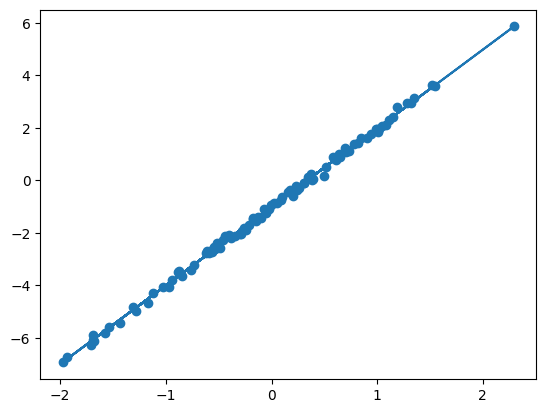

In [6]:
# Approve each request and run the user codes 
for message in messages:    
    request = message.link
    func = request.changes[0].link
    func_name = func.service_func_name
    print(func_name)
    user_func = func.unsafe_function
    kwargs = possible_kwargs[func_name]
    real_result = user_func(**kwargs)
    print(real_result)
    request.approve()
    result = request.accept_by_depositing_result(real_result)
    print(result)

Go to Part 3!